Number of Cities  2 Stortest path: 0-1-0                          cost:   20 Time to Execute (DFS): 0.001 Seconds
Number of Cities  2 Stortest path: 0-1-0                          cost:   20 Time to Execute (BFT): 0.000 Seconds
Number of Cities  3 Stortest path: 1-0-2-1                        cost:   63 Time to Execute (DFS): 0.000 Seconds
Number of Cities  3 Stortest path: 1-0-2-1                        cost:   63 Time to Execute (BFT): 0.000 Seconds
Number of Cities  4 Stortest path: 1-2-0-3-1                      cost:   96 Time to Execute (DFS): 0.000 Seconds
Number of Cities  4 Stortest path: 1-2-0-3-1                      cost:   96 Time to Execute (BFT): 0.000 Seconds
Number of Cities  5 Stortest path: 2-0-3-4-1-2                    cost:   71 Time to Execute (DFS): 0.001 Seconds
Number of Cities  5 Stortest path: 2-0-3-4-1-2                    cost:   71 Time to Execute (BFT): 0.000 Seconds
Number of Cities  6 Stortest path: 2-0-5-3-4-1-2                  cost:  101 Time to Exe

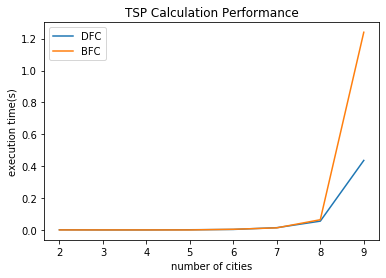

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSP:
    
    def CreateDataSet (self,numberofCities):
        
        self.numberofCities = numberofCities
        self.cityMatrix = np.random.randint(25,size=(self.numberofCities, self.numberofCities))
        self.cityMatrix = (self.cityMatrix + self.cityMatrix.T)
        self.cityMatrix = self.cityMatrix - np.diag(self.cityMatrix.diagonal())
        
        self.citylist = list(range(0,self.numberofCities))
        
        
    def TSPAlgorithm(self,searchType):
                
        self.visitedCites = list()
        
        self.visitedCites.append(self.startCity)# add random city as starting city

        self.minTSP = 0
        self.path = ''
        
        #Select which search type need to use
        # DFS
        if searchType:
            self.CalculatePathDFS('',self.startCity,0)
            print("Number of Cities {:>2} Stortest path: {:<30} cost: {:>4}".format(self.numberofCities,self.path,self.minTSP),end='')

        # BFS
        else:
            pathCostlist = [[[self.startCity],0]] # store both visited path and cost [[[path1],cost1],[[path2],cost2]]
            while len(pathCostlist) != 0: # stop when pathCostlist list is empty
                
                pathCost = pathCostlist.pop(0) # pathcost [[0,1,3,4],100] [[visited cities], cost]
                #return all the possible path to visit 
                result = self.CalculatePathBFS(pathCost[0],pathCost[1])
                
                # if result is empty all the paths are visited.
                if len(result) == 0:
                    continue
                # if return the enqueue to list
                for node in result:
                    pathCostlist.append(node)
                    
            print("Number of Cities {:>2} Stortest path: {:<30} cost: {:>4}".format(self.numberofCities,'-'.join(map(str,self.path)),self.minTSP),end='')
             
        
    def CalculatePathDFS(self, path, currentCity, cost):
        # filter not visited cities
        cities = list(filter( lambda city : city not in self.visitedCites, self.citylist))
        
        # update path
        path += str(currentCity) + "-";
        
        # if no not visited citiy found calculate total path cost and check current total path 
        # cost is less than current shortest path, if so update shortest path and cost
        if (len(cities)==0):
            cost += self.cityMatrix[currentCity, self.startCity];
            path += str(self.startCity);
            if(self.minTSP == 0 or self.minTSP > cost):
                self.minTSP = cost
                self.path = path
            return;
        
        # Visit all paths.
        for nextCity in cities:
            self.visitedCites.append(nextCity);
            self.CalculatePathDFS(path, nextCity,cost+ self.cityMatrix[currentCity, nextCity]);
            self.visitedCites.pop( )   
    
    def CalculatePathBFS(self, visitedCites,cost):
        # filter not visited cities
        cities = list(filter( lambda city : city not in visitedCites, self.citylist))
        
        #get last visited city
        currentCity = visitedCites[-1]
        
        
        if (len(cities)==0):            
            cost += self.cityMatrix[currentCity, self.startCity];
            if(self.minTSP == 0 or self.minTSP > cost):
                self.minTSP = cost
                self.path = list(visitedCites)
                self.path.append(self.startCity)
            return [];
        
        result = []
        # find possible paths to visit and the cost for each path
        # return list of path that can visit
        for nextCity in cities:
            temp = list(visitedCites)
            temp.append(nextCity);
            tempCost = cost+ self.cityMatrix[currentCity, nextCity];
            tempresult = []
            tempresult.append(temp)
            tempresult.append(tempCost)
            result.append(tempresult)
        return result


                            
obj = TSP()
                                    
citylist = range(2,10)
executionTimeBFS = []
executionTimeDFS = []
                                    
for i in citylist:
    
    obj.CreateDataSet(i)
    
    obj.startCity = random.randint(0,i-1)
    
    # DFS 
    start = time.time()
    obj.TSPAlgorithm(True)
    end = time.time()
    print(" Time to Execute (DFS): {:.3f} Seconds".format(end- start))
    executionTimeDFS.append(end - start)
    
    # BFS
    start = time.time()
    obj.TSPAlgorithm(False)
    end = time.time()
    print(" Time to Execute (BFT): {:.3f} Seconds".format(end- start))
    executionTimeBFS.append(end - start)
                            
lineDFS = plt.plot(citylist,executionTimeDFS,label='DFC')
lineBFS = plt.plot(citylist,executionTimeBFS,label='BFC')

plt.xlabel("number of cities")
plt.ylabel("execution time(s)")
plt.title("TSP Calculation Performance")
plt.legend()

plt.show()
